In [55]:
import os
import requests
import pandas as pd
import numpy as np 
import seaborn as sns 
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym


#from stable_baselines.com.vec_env import DummyVecEnv
#import gym_anytrading
!pip install hvplot
import hvplot.pandas
import matplotlib.pyplot as plt
!pip install yfinance
!pip install YahooFinancials
#!pip install fdpf


import yfinance as yf
from finta import TA

%matplotlib inline
#streamlit or tableau of 


In [56]:
import yfinance as yf
from yahoofinancials import YahooFinancials

In [57]:
xeroasx = yf.download('XRO.AX', start = '2018-01-01', end = '2022-08-01')

[*********************100%***********************]  1 of 1 completed


In [58]:
#This is but one share that has performed well on the Australian share market so we could enhance this for stock selection in a streamlit 


In [59]:
def MACD(xeroasx): 
    xeroasx['EMA12'] = xeroasx.Close.ewm(span=12).mean()
    xeroasx['EMA26'] = xeroasx.Close.ewm(span=26).mean()
    xeroasx['MACD'] = xeroasx.EMA12-xeroasx.EMA26
    xeroasx['signal'] = xeroasx.MACD.ewm(span=9).mean() 
    print ("indicators added") 

In [60]:
MACD() 

TypeError: MACD() missing 1 required positional argument: 'xeroasx'

In [61]:
xeroasx

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,28.719999,28.850000,28.180000,28.350000,28.350000,33682
2018-01-03,28.850000,28.850000,28.250000,28.700001,28.700001,133086
2018-01-04,28.719999,28.719999,28.260000,28.549999,28.549999,147271
2018-01-05,28.650000,29.049999,28.530001,28.900000,28.900000,145177
2018-01-08,29.070000,29.639999,29.070000,29.480000,29.480000,198755
...,...,...,...,...,...,...
2022-07-25,90.440002,90.980003,88.720001,90.260002,90.260002,608109
2022-07-26,89.120003,89.550003,87.699997,89.129997,89.129997,321185
2022-07-27,87.809998,90.000000,87.809998,89.589996,89.589996,321073


In [62]:
plt.plot(xeroasx.signal, label = 'signal', color = 'red')
plt.plot(xeroasx.MACD, label = 'MACD', color = 'green') 
plt.legend() 
plt.show() 
         

AttributeError: 'DataFrame' object has no attribute 'signal'

In [63]:
Buy, Sell = [], []
for i in range (2, len(xeroasx)):
    if xeroasx.MACD.iloc[i] > xeroasx.signal.iloc[i] and xeroasx.MACD.iloc[i-1] < xeroasx.signal.iloc[i-1]: 
        Buy.append[i] 
    if xeroasx.MACD.iloc[i] < xeroasx.signal.iloc[i] and xeroasx.MACD.iloc[i-1] > xeroasx.signal.iloc[i-1]: 
        Sell.append[i]  

AttributeError: 'DataFrame' object has no attribute 'MACD'

In [64]:
Buy

[]

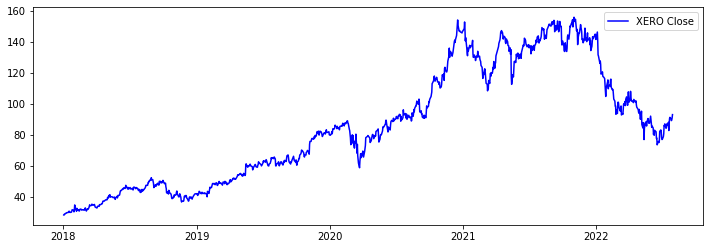

In [65]:
plt.figure(figsize = (12, 4))
plt.scatter(xeroasx.iloc[Buy].index, xeroasx.iloc[Buy].Close, marker ="^", color = 'green') 
plt.scatter(xeroasx.iloc[Sell].index, xeroasx.iloc[Sell].Close, marker ="v", color = 'red') 
plt.plot(xeroasx.Close, label = 'XERO Close', color ='blue') 
plt.legend() 
plt.show() 

In [66]:
truebuys = [i+1 for i in Buy] 
truesells = [i+1 for i in Sell] 

In [67]:
buyprices = xeroasx.Open.iloc[truebuys]
sellprices = xeroasx.Open.iloc[truesells]


In [54]:
buyprices

Series([], Name: Open, dtype: float64)

In [ ]:
if sellprices.index[0] < buyprices.index[0]: 
    sellprices = sellprices.drop(sellprices.index[0])
elif buyprices.index[-1] > sellprices.index[-1] 
    buyprices = buyprices.drop(buyprices.index[-1]) 

In [ ]:
relprofit = [] 

for i in range(len(sellprices)):
    relprofits.append((sellprices[i] - buyprices[i])/(buyprices[i]) 

In [ ]:
relprofits

In [ ]:
sum(relprofit)/len(relprofits)